# Explore the data

The data comes from https://www.kaggle.com/datasets/basilb2s/language-detection and is a small language detection dataset. This dataset consists of text details for 17 different languages, as follows: 

Languages
1. English 
2. Malayalam
3. Hindi
4. Tamil
5. Kannada
6. French
7. Spanish
8. Portuguese
9. Italian
10. Russian
11. Sweedish
12. Dutch
13. Arabic
14. Turkish
15. German
16. Danish
17. Greek

### Import the data, check duplicates

In [1]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data 
data = pd.read_csv("../data/raw/Language Detection.csv")

In [3]:
data.shape

(10337, 2)

In [4]:
data.sample(5)

,Text,Language
7576,e tu sei come oh quello che lo spiega quello c...,Italian
7844,Bu lisans ayrıca yeniden katılım gösterenlerin...,Turkish
9391,أنت محق تماما.,Arabic
5119,Esta organización se encargó de registrar los ...,Spanish
8142,bunu tekrar etmenin bir sakıncası var mı?,Turkish


In [5]:
# Are there missing data?
data.isna().sum()

Text        0
Language    0
dtype: int64

In [6]:
# There are 10,337 values. Are there duplicated? 
data.duplicated().sum()

66

In [7]:
data[data.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [8]:
# I don't want there to be duplicated data, so I will remove the duplicates and save as df
df = data.drop_duplicates()

In [9]:
df.shape

(10271, 2)

In [10]:
# Let's see what the languages are most common 
lang_counts = df.groupby('Language')['Text'].count()
lang_counts.sort_values(ascending=False, inplace=True)
lang_counts.head()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Name: Text, dtype: int64

### Data exploration: distribution

Text(0, 0.5, 'Number of text in language')

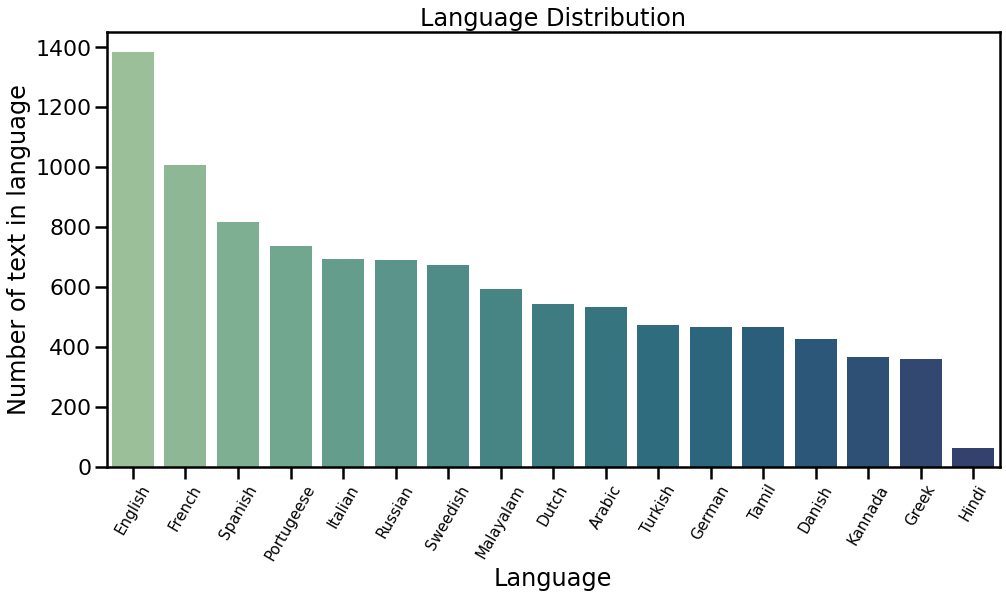

In [11]:
# This leaves us with 10,271 unique values. How are they distributed?
sns.set_context('poster')
plt.figure(figsize=(16,8))
plt.xticks(fontsize = 15, rotation = 60)
palette = sns.color_palette("crest", n_colors=len(lang_counts))

sns.barplot(x=lang_counts.index, y=lang_counts, palette=palette)

plt.title('Language Distribution')
plt.xlabel("Language")
plt.ylabel("Number of text in language")

The text is not evenly distributed! This will be important later, since we need to take this into account for out machine learning model. 

### Text preprocessing

In [12]:
# iterate through all the text and convert it to lower case without symbols and numbers
text_list = []
for text in df.Text:
    text = re.sub(r'[\[\]!@#$(),\n"%^*?\:;~`0-9]', ' ', text) # Remove symbols 
    text = text.lower() # convert to lower case
    text = re.sub(' +', ' ', text) # Remove extra spaces
    text_list.append(text)

In [14]:
df.Text = text_list

In [16]:
df.to_csv("../data/processed/language_cleaned.csv")